# Ecommerce Data 

#### by Tejas R

**Business Objective:**

**A US based Ecommerce sales company wants us to analyze a sales report showing information of YTD(Year to Date) sales and generate insights for below scenarios:**

**1.Find YTD sales performance by each state.**

**2.Top 5 and bottom 5 products by sales.**

**3.Sales by Region to know the best and worst performing region all over country.**

**4.Sales by shipping type to get the best shipping type percentage.**

**5.Analyze the sales on daily, weekly and monthly basis.**

**6.Find sales trends by product category.**

**7.Find sales trends by customer category.**

**8.Profits based on States, products, and Regions.**

In [1]:
import os
os.chdir('C:\\Users\\Tejas\\Desktop\\Data Science\\Data Analyst Project\\Ecommerce Sales')

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0CE4-64E6

 Directory of C:\Users\Tejas\Desktop\Data Science\Data Analyst Project\Ecommerce Sales

19-07-2023  11:47    <DIR>          .
11-07-2023  13:00    <DIR>          ..
12-07-2023  12:31    <DIR>          .ipynb_checkpoints
12-07-2023  13:22    <DIR>          .vs
19-07-2023  11:47           633,289 Ecommerce.ipynb
11-07-2023  19:30        25,634,010 ecommerce_data.csv
11-07-2023  12:58            24,514 Final Back.jpg
11-07-2023  20:44                53 SQLQuery1.sql
11-07-2023  12:59             1,840 us_state_long_lat_codes.csv
               5 File(s)     26,293,706 bytes
               4 Dir(s)  18,762,563,584 bytes free


In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
ec = pd.read_csv('ecommerce_data.csv',encoding='unicode_escape')

In [5]:
ec.head()

,customer_id,customer_first_name,customer_last_name,category_name,product_name,customer_segment,customer_city,customer_state,customer_country,customer_region,...,order_date,order_id,ship_date,shipping_type,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
0,C_ID_45866,Mary,Fuller,Office Supplies,Xerox 1913,Corporate,New Rochelle,New York,United States,East,...,11-05-2022,O_ID_3001072,11-07-2022,Second Class,2,2,35.0,500.0,5,223.199997
1,C_ID_44932,Alan,Edelman,Office Supplies,#6 3/4 Gummed Flap White Envelopes,Corporate,Houston,Texas,United States,Central,...,20-06-2022,O_ID_3009170,23-06-2022,Second Class,2,3,85.0,500.0,5,199.199997
2,C_ID_70880,Mary,Gayman,Office Supplies,Belkin 8 Outlet Surge Protector,Consumer,Louisville,Kentucky,United States,South,...,25-06-2022,O_ID_3047567,30-06-2022,Standard Class,4,5,75.0,44.0,5,195.500000
3,C_ID_33157,Raymond,Eason,Office Supplies,GBC VeloBinder Manual Binding System,Corporate,Chicago,Illinois,United States,Central,...,10-06-2022,O_ID_3060575,10-10-2022,Second Class,2,4,60.0,254.0,1,220.000000
4,C_ID_58303,Mary,Gonzalez,Furniture,Eldon Pizzaz Desk Accessories,Home Office,Philadelphia,Pennsylvania,United States,East,...,02-05-2022,O_ID_3064311,08-01-2022,First Class,1,2,125.0,500.0,1,97.500000


In [6]:
ec.shape

(113270, 21)

This dataset contains 1132710 rows and 21 columns

In [7]:
ec.isnull().sum()

customer_id                    0
customer_first_name            0
customer_last_name             0
category_name                  0
product_name                   0
customer_segment               0
customer_city                  0
customer_state                 0
customer_country               0
customer_region                0
delivery_status                0
order_date                     0
order_id                       0
ship_date                      0
shipping_type                  0
days_for_shipment_scheduled    0
days_for_shipment_real         0
order_item_discount            0
sales_per_order                0
order_quantity                 0
profit_per_order               0
dtype: int64

In [8]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113270 entries, 0 to 113269
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  113270 non-null  object 
 1   customer_first_name          113270 non-null  object 
 2   customer_last_name           113270 non-null  object 
 3   category_name                113270 non-null  object 
 4   product_name                 113270 non-null  object 
 5   customer_segment             113270 non-null  object 
 6   customer_city                113270 non-null  object 
 7   customer_state               113270 non-null  object 
 8   customer_country             113270 non-null  object 
 9   customer_region              113270 non-null  object 
 10  delivery_status              113270 non-null  object 
 11  order_date                   113270 non-null  object 
 12  order_id                     113270 non-null  object 
 13 

Here we need to change the data types of order date and ship date from object to datetime format.

In [9]:
ec['order_date'].head()

0    11-05-2022
1    20-06-2022
2    25-06-2022
3    10-06-2022
4    02-05-2022
Name: order_date, dtype: object

In [10]:
ec['order_date'] = pd.to_datetime(ec['order_date'])
ec['ship_date'] = pd.to_datetime(ec['ship_date'])

In [11]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113270 entries, 0 to 113269
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   customer_id                  113270 non-null  object        
 1   customer_first_name          113270 non-null  object        
 2   customer_last_name           113270 non-null  object        
 3   category_name                113270 non-null  object        
 4   product_name                 113270 non-null  object        
 5   customer_segment             113270 non-null  object        
 6   customer_city                113270 non-null  object        
 7   customer_state               113270 non-null  object        
 8   customer_country             113270 non-null  object        
 9   customer_region              113270 non-null  object        
 10  delivery_status              113270 non-null  object        
 11  order_date                

In [12]:
ec.duplicated().sum()

0

In [13]:
ec.order_id.duplicated().sum()

0

In [14]:
ec.describe()

,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
count,113270.000000,113270.000000,113270.000000,113270.000000,113270.000000,113270.000000
mean,2.931209,3.464006,21.105465,204.499537,1.967564,23.069382
std,1.375914,1.632198,22.959207,141.443090,1.355254,105.288561
min,0.000000,0.000000,0.000000,9.990000,1.000000,-3366.000000
25%,2.000000,2.000000,5.500000,119.980003,1.000000,7.200000
50%,4.000000,3.000000,14.400000,199.919998,1.000000,32.029999
75%,4.000000,5.000000,30.000000,299.950012,3.000000,65.570000
max,4.000000,6.000000,500.000000,1999.989990,5.000000,2600.000000


In [15]:
ec.category_name.unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [16]:
ec.category_name.value_counts()

Office Supplies    68111
Furniture          24443
Technology         20716
Name: category_name, dtype: int64

<AxesSubplot:xlabel='category_name', ylabel='count'>

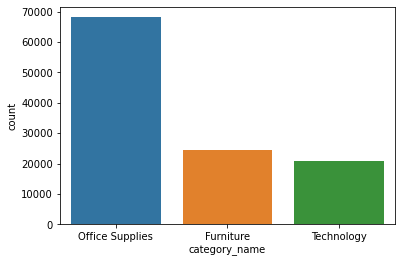

In [17]:
sns.countplot(data = ec,x='category_name')

Here we can see that most of the orders came from Office supplies category compared to Furniture and Technology.

In [18]:
ec.customer_segment.value_counts()

Consumer       58714
Corporate      34322
Home Office    20234
Name: customer_segment, dtype: int64

<AxesSubplot:xlabel='customer_segment', ylabel='count'>

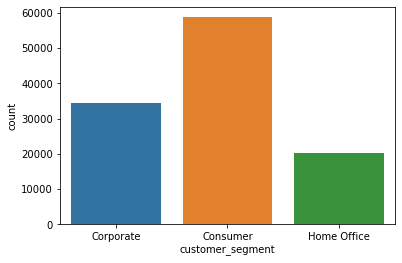

In [19]:
sns.countplot(data = ec,x='customer_segment')

Text(0.5, 0, 'Profit')

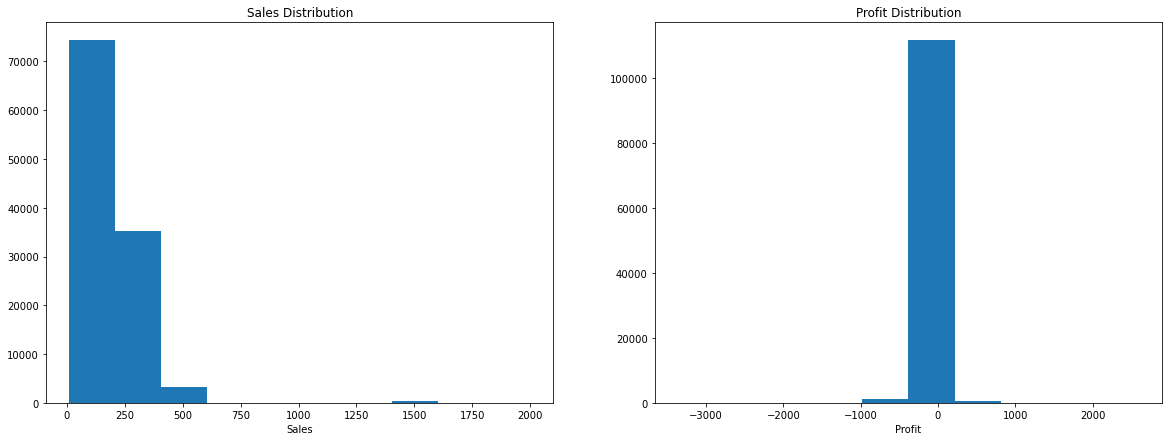

In [20]:
plt.figure(figsize=(20,7))

           
plt.subplot(1,2,1)
plt.hist(data = ec,x = 'sales_per_order')
plt.title('Sales Distribution')
plt.xlabel('Sales')

plt.subplot(1,2,2)
plt.hist(data = ec,x = 'profit_per_order')
plt.title('Profit Distribution')
plt.xlabel('Profit')

Distribution of Sales and Profit. Sales is left skewed and Profit seems to be normally distributed.

Text(0.5, 0, 'Discount')

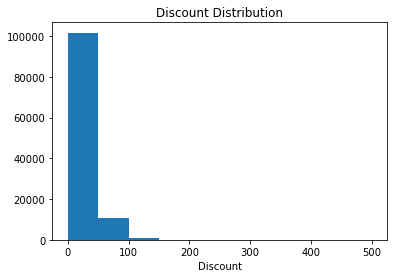

In [21]:
plt.hist(data = ec,x = 'order_item_discount')
plt.title('Discount Distribution')
plt.xlabel('Discount')

Distribution of discount is left skewed.

<AxesSubplot:xlabel='profit_per_order'>

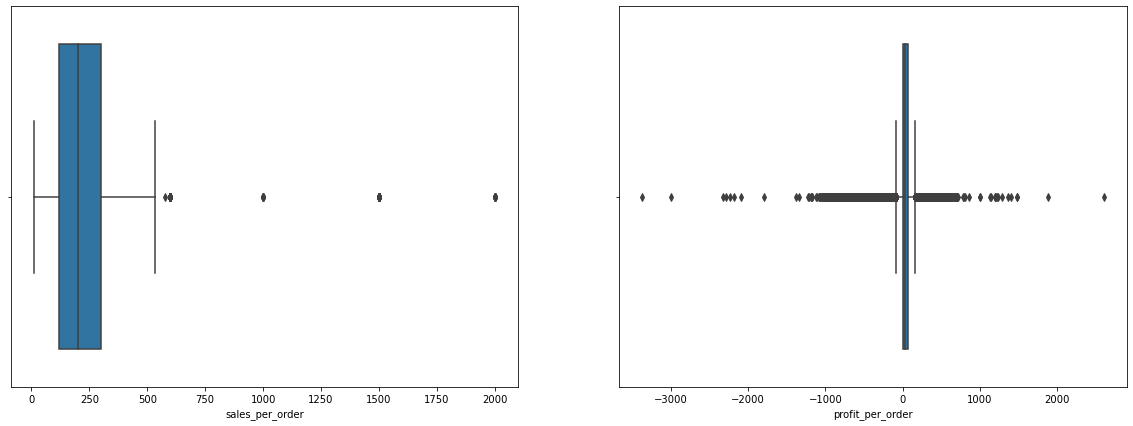

In [22]:
plt.figure(figsize=(20,7))
           
plt.subplot(1,2,1)
sns.boxplot(data = ec,x = 'sales_per_order')

plt.subplot(1,2,2)
sns.boxplot(data = ec,x = 'profit_per_order')

<AxesSubplot:xlabel='order_quantity'>

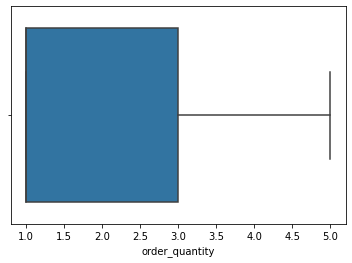

In [23]:
sns.boxplot(data = ec,x = 'order_quantity')

In [24]:
ec.corr()

,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
days_for_shipment_scheduled,1.000000,0.504618,0.007090,0.003616,0.034208,0.001725
days_for_shipment_real,0.504618,1.000000,0.000456,0.008664,-0.029068,-0.002881
order_item_discount,0.007090,0.000456,1.000000,0.610083,0.065680,0.086943
sales_per_order,0.003616,0.008664,0.610083,1.000000,0.107126,0.167815
order_quantity,0.034208,-0.029068,0.065680,0.107126,1.000000,0.019062
profit_per_order,0.001725,-0.002881,0.086943,0.167815,0.019062,1.000000


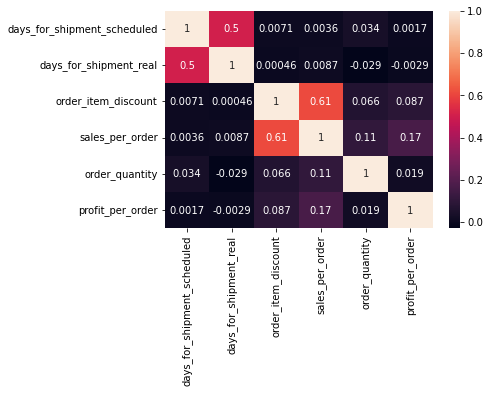

In [25]:
sns.heatmap(ec.corr(),annot = True)
plt.show()

From the Heatmap we can observe that both sales per order and order item discount are highly correlated compared to others.
From this we can conclude that increase in discount rates might increase in Sales.

<AxesSubplot:xlabel='order_item_discount', ylabel='sales_per_order'>

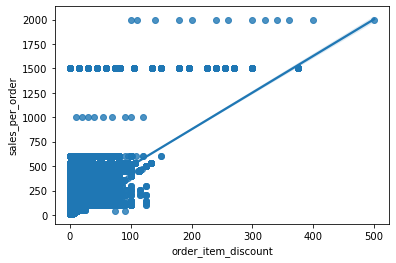

In [26]:
sns.regplot(data=ec,x='order_item_discount',y='sales_per_order')

**1) Find YTD sales performance by each state.**

In [27]:
Sales_by_state = ec.groupby(["customer_state"])[["sales_per_order"]].sum()

In [28]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Used this code because we were getting values in exponential form.

In [29]:
Sales_by_state

,sales_per_order
customer_state,
Alabama,139861.297
Arizona,517880.312
Arkansas,141568.551
California,4652153.659
Colorado,407763.201
Connecticut,186463.357
Delaware,227430.614
District of Columbia,27911.596
Florida,890342.540


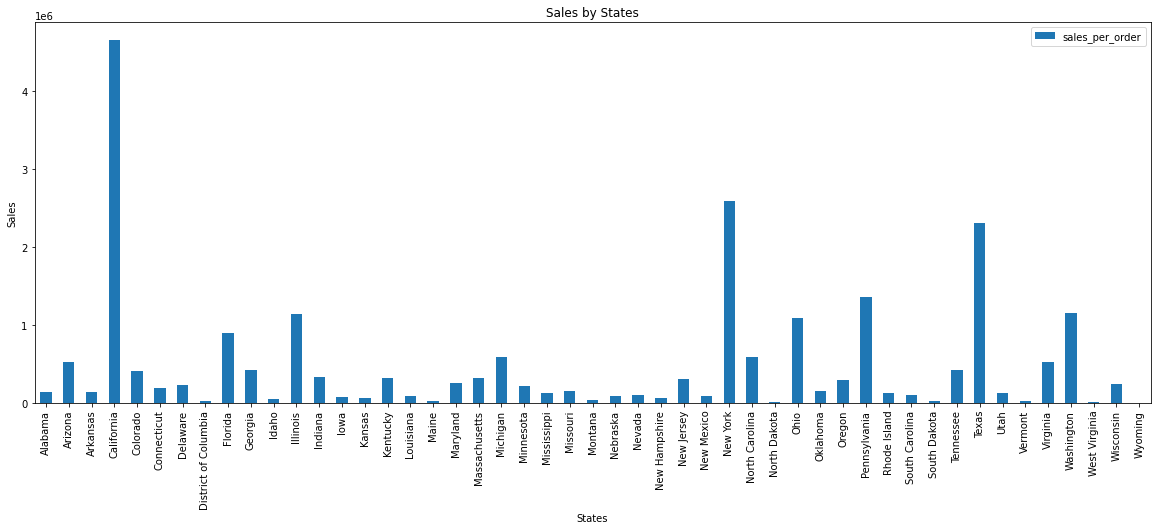

In [30]:
Sales_by_state.plot(kind='bar',figsize=(20,7))
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Sales by States')
plt.show()

In [31]:
Sales_by_state.sort_values(by = ['sales_per_order'],ascending = False, inplace = True)

In [32]:
Top_5_sales_by_state = Sales_by_state.head()

In [33]:
Top_5_sales_by_state

,sales_per_order
customer_state,
California,4652153.659
New York,2588064.529
Texas,2309429.992
Pennsylvania,1361662.611
Washington,1158349.123


Here we can observe that top 5 Sales by States. And California state is top among the list with 4.6 Million.

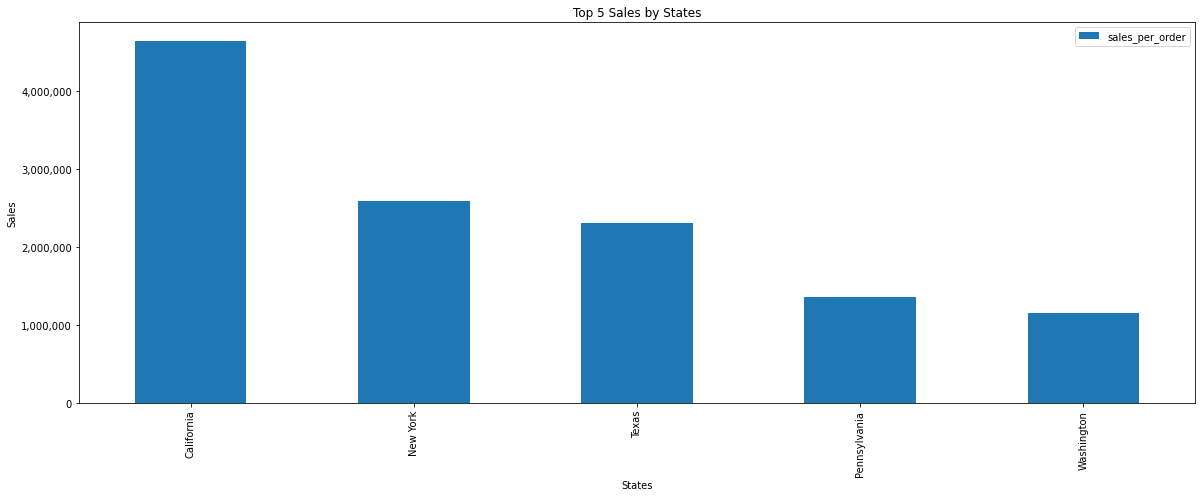

In [34]:
Top_5_sales_by_state.plot(kind='bar',figsize=(20,7))
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Top 5 Sales by States')
Top_5_sales_by_state = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Top_5_sales_by_state])
plt.show()

In [35]:
Bottom_5_sales_by_states = Sales_by_state.tail()

In [36]:
Bottom_5_sales_by_states

,sales_per_order
customer_state,
South Dakota,23115.881
Maine,19754.898
North Dakota,16081.020
West Virginia,9129.180
Wyoming,2459.450


Here we can observe the bottom 5 Sales by States.

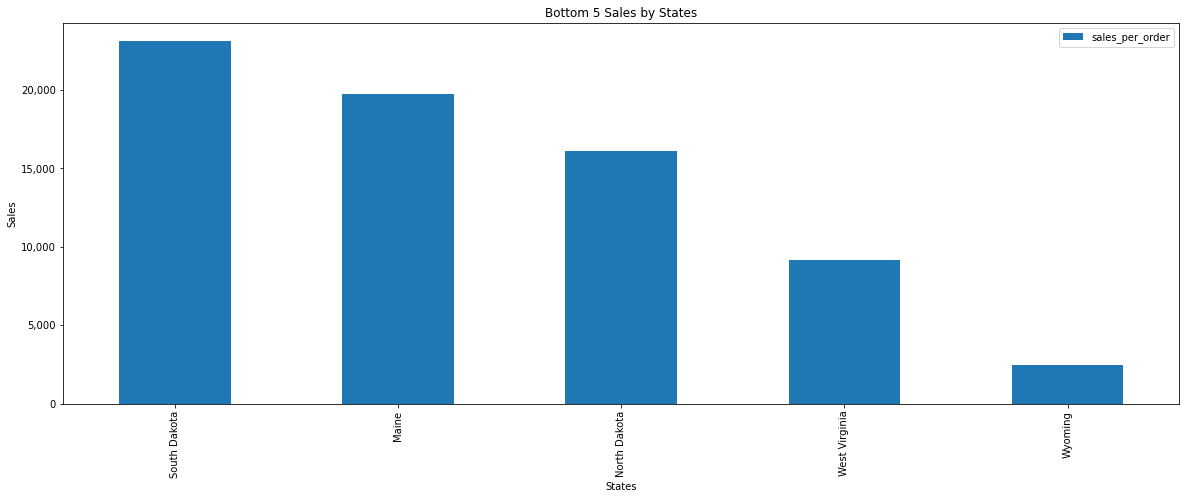

In [37]:
Bottom_5_sales_by_states.plot(kind='bar',figsize=(20,7))
plt.xlabel('States')
plt.ylabel('Sales')
plt.title('Bottom 5 Sales by States')
Bottom_5_sales_by_state = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Bottom_5_sales_by_state])
plt.show()

**2)Top 5 and bottom 5 products by sales.**

In [38]:
ec.product_name.unique()

array(['Xerox 1913', '#6 3/4 Gummed Flap White Envelopes',
       'Belkin 8 Outlet Surge Protector', ...,
       'Eldon File Chest Portable File',
       'Avery Hi-Liter Pen Style Six-Color Fluorescent Set',
       'Lexmark X 9575 Professional All-in-One Color Printer'],
      dtype=object)

In [39]:
len(ec['product_name'].unique())

1849

In [40]:
Sales_by_products = ec.groupby(["product_name"])[["sales_per_order"]].sum()

In [41]:
Sales_by_products.head(10)

,sales_per_order
product_name,
"""While you Were Out"" Message Book, One Form per Page",5517.380
"#10 Gummed Flap White Envelopes, 100/Box",8723.160
#10 Self-Seal White Envelopes,9035.920
"#10 White Business Envelopes,4 1/8 x 9 1/2",16265.380
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",23495.580
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",18091.630
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",3742.150
#6 3/4 Gummed Flap White Envelopes,9908.910
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",16572.380


In [42]:
Sales_by_products.sort_values(by = ['sales_per_order'],ascending = False, inplace = True)

In [43]:
Top_10_sales_by_products = Sales_by_products.head(10)

In [44]:
Top_10_sales_by_products

,sales_per_order
product_name,
Staples,113516.286
Staple envelope,112116.902
Easy-staple paper,99214.066
KI Adjustable-Height Table,45882.999
Avery Non-Stick Binders,45687.199
Staples in misc. colors,45588.071
Staple remover,39212.101
Storex Dura Pro Binders,38114.471
Staple-based wall hangings,36651.979


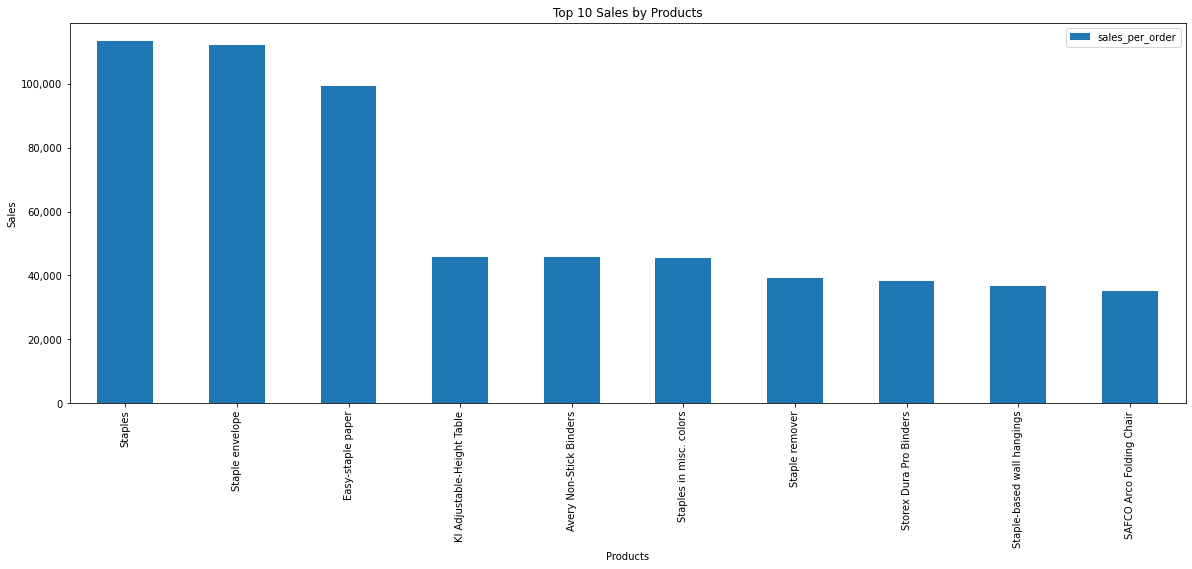

In [45]:
Top_10_sales_by_products.plot(kind='bar',figsize=(20,7))
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Top 10 Sales by Products')
Top_10_sales_by_products = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Top_10_sales_by_products])
plt.show()

In [46]:
Bottom_10_products_by_sales = Sales_by_products.tail(10)

In [47]:
Bottom_10_products_by_sales

,sales_per_order
product_name,
Zebra GK420t Direct Thermal/Thermal Transfer Printer,1706.130
Xerox 1932,1691.640
4009 Highlighters,1681.810
Nokia Lumia 1020,1651.130
NeatDesk Desktop Scanner & Digital Filing System,1612.758
Eldon Jumbo ProFile Portable File Boxes Graphite/Black,1604.760
Hewlett-Packard Deskjet D4360 Printer,1574.810
"Linden 12"" Wall Clock With Oak Frame",1545.840
RCA ViSYS 25425RE1 Corded phone,1494.800


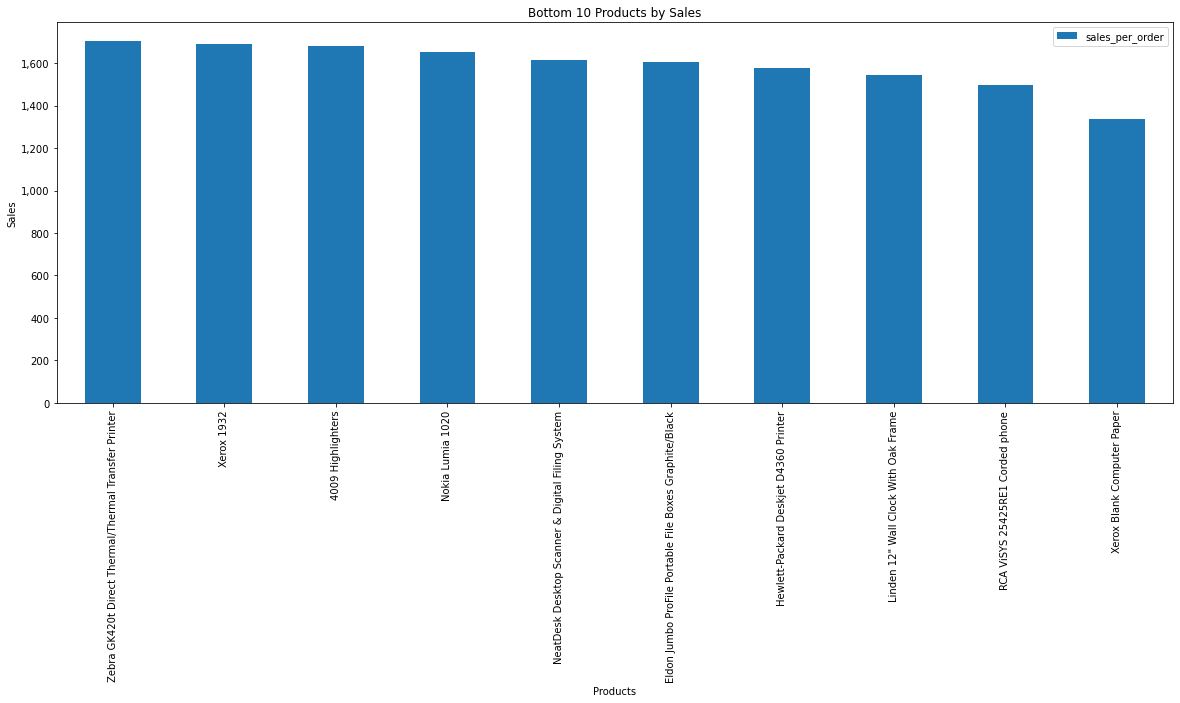

In [48]:
Bottom_10_products_by_sales.plot(kind='bar',figsize=(20,7))
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Bottom 10 Products by Sales')
Bottom_10_products_by_sales = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Bottom_10_products_by_sales])
plt.show()

**3)Sales by Region to know the best and worst performing region all over country.**

In [49]:
Sales_by_Region = ec.groupby(["customer_region"])[["sales_per_order"]].sum()

In [50]:
Sales_by_Region

,sales_per_order
customer_region,
Central,5394895.106
East,6592977.468
South,3755565.711
West,7420224.279


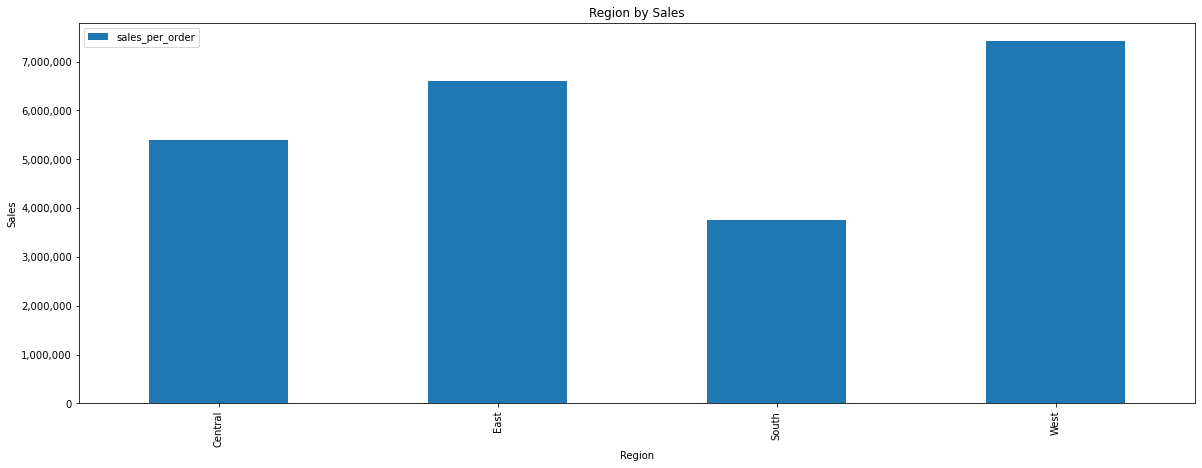

In [51]:
Sales_by_Region.plot(kind='bar',figsize=(20,7))
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Region by Sales')
Sales_by_Region = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Sales_by_Region])
plt.show()

From the above Bar chart we can conclude that 'West Region' as the best sales report among other Regions followed by East, Central and South Regions. 'South Region' has the worst sales report.

**4)Sales by shipping type to get the best shipping type percentage.**

In [52]:
ec.shipping_type.unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [53]:
len(ec.shipping_type.unique())

4

In [54]:
Sales_by_shipping_type = ec.groupby(["shipping_type"])[["sales_per_order"]].sum()

In [55]:
Sales_by_shipping_type

,sales_per_order
shipping_type,
First Class,3595518.497
Same Day,1224602.111
Second Class,4496222.985
Standard Class,13847318.971


In [56]:
Sales_by_shipping_type['Sales_percentage_by_best_shipping_type'] = (Sales_by_shipping_type['sales_per_order']/
                                                                    Sales_by_shipping_type['sales_per_order'].sum())*100

In [57]:
Sales_by_shipping_type

,sales_per_order,Sales_percentage_by_best_shipping_type
shipping_type,,
First Class,3595518.497,15.522
Same Day,1224602.111,5.287
Second Class,4496222.985,19.411
Standard Class,13847318.971,59.780


In [58]:
Percentage_by_best_shipping_type = Sales_by_shipping_type.filter(['shipping_type','Sales_percentage_by_best_shipping_type'],axis=1)

In [59]:
Percentage_by_best_shipping_type

,Sales_percentage_by_best_shipping_type
shipping_type,
First Class,15.522
Same Day,5.287
Second Class,19.411
Standard Class,59.780


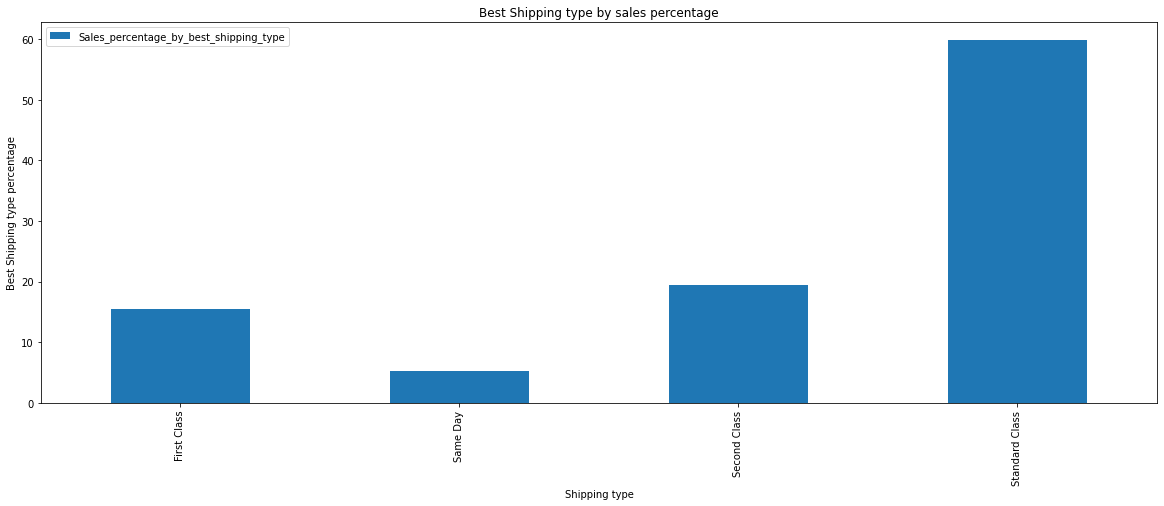

In [60]:
Percentage_by_best_shipping_type.plot(kind='bar',figsize=(20,7))
plt.xlabel('Shipping type')
plt.ylabel('Best Shipping type percentage')
plt.title('Best Shipping type by sales percentage')
Percentage_by_best_shipping_type = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Percentage_by_best_shipping_type])
plt.show()

From the above Bar chart we can conclude that 'Standard Class' as the best Shipping type with almost 60% of sales occured compared to others.

**5)Analyze the sales on daily, weekly and monthly basis.**

In [61]:
ec.order_date.head()

0   2022-11-05
1   2022-06-20
2   2022-06-25
3   2022-10-06
4   2022-02-05
Name: order_date, dtype: datetime64[ns]

In [62]:
Sales_by_time = ec.filter(['order_date','sales_per_order'])

In [63]:
Sales_by_time.head()

,order_date,sales_per_order
0,2022-11-05,500.000
1,2022-06-20,500.000
2,2022-06-25,44.000
3,2022-10-06,254.000
4,2022-02-05,500.000


In [64]:
Sales_by_time['Year'] = Sales_by_time['order_date'].dt.strftime('%Y')
Sales_by_time.head(10)                                                           

,order_date,sales_per_order,Year
0,2022-11-05,500.000,2022
1,2022-06-20,500.000,2022
2,2022-06-25,44.000,2022
3,2022-10-06,254.000,2022
4,2022-02-05,500.000,2022
5,2022-06-24,500.000,2022
6,2022-07-10,299.980,2022
7,2022-01-26,299.980,2022
8,2022-09-03,299.980,2022
9,2022-03-19,299.980,2022


In [65]:
Sales_by_time.Year.unique()

array(['2022', '2021'], dtype=object)

In [66]:
Dataframe = pd.DataFrame(Sales_by_time, columns = [ 'order_date','sales_per_order'])

In [67]:
Dataframe.head()

,order_date,sales_per_order
0,2022-11-05,500.000
1,2022-06-20,500.000
2,2022-06-25,44.000
3,2022-10-06,254.000
4,2022-02-05,500.000


In [68]:
Dataframe.set_index('order_date',inplace=True)

In [69]:
Dataframe.head()

,sales_per_order
order_date,
2022-11-05,500.000
2022-06-20,500.000
2022-06-25,44.000
2022-10-06,254.000
2022-02-05,500.000


In [70]:
def data_prep(Dataframe):
    df=pd.DataFrame()
    df['year'] = Dataframe.index.year
    df['month'] = Dataframe.index.month
    df['month_name'] = Dataframe.index.month_name()
    df['week_of_year'] = Dataframe.index.weekofyear
    df['quarter'] = Dataframe.index.quarter
    df['day_of_week'] = Dataframe.index.dayofweek
    df['day_of_week_name'] = Dataframe.index.day_name()
    df['day_of_month'] = Dataframe.index.day
    df['day_of_year'] = Dataframe.index.dayofyear
    df['sales_per_order']=Dataframe.sales_per_order.values
    
    return df

In [71]:
df = data_prep(Dataframe)

In [72]:
df

,year,month,month_name,week_of_year,quarter,day_of_week,day_of_week_name,day_of_month,day_of_year,sales_per_order
0,2022,11,November,44,4,5,Saturday,5,309,500.000
1,2022,6,June,25,2,0,Monday,20,171,500.000
2,2022,6,June,25,2,5,Saturday,25,176,44.000
3,2022,10,October,40,4,3,Thursday,6,279,254.000
4,2022,2,February,5,1,5,Saturday,5,36,500.000
...,...,...,...,...,...,...,...,...,...,...
113265,2021,12,December,48,4,5,Saturday,4,338,199.990
113266,2022,12,December,51,4,0,Monday,19,353,31.080
113267,2021,3,March,11,1,2,Wednesday,17,76,199.990
113268,2021,4,April,13,2,6,Sunday,4,94,299.980


In [73]:
# Creating times grouped dataframes in order to analyse them
df_year = df.groupby('year')['sales_per_order'].mean()
df_month = df.groupby('month_name', sort = False)['sales_per_order'].mean()
df_week_of_year = df.groupby('week_of_year')['sales_per_order'].mean()
df_quarter = df.groupby('quarter')['sales_per_order'].mean()
df_day_of_week = df.groupby('day_of_week_name', sort = False)['sales_per_order'].mean()
df_day_of_month = df.groupby('day_of_month')['sales_per_order'].mean()
df_day_of_year = df.groupby('day_of_year')['sales_per_order'].mean()

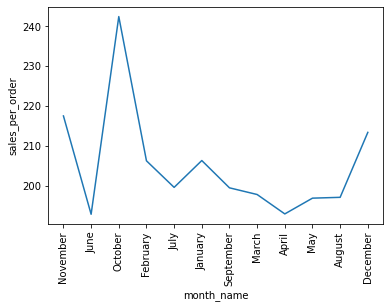

In [74]:
##  plotting mean of sales for months 
sns.lineplot(x=df_month.index,y=df_month,data='df')
plt.xticks(rotation=90)
plt.show()

From the above Lineplot we can clearly observe that October, November and December has high sales compared to other months.

<AxesSubplot:xlabel='day_of_week_name', ylabel='sales_per_order'>

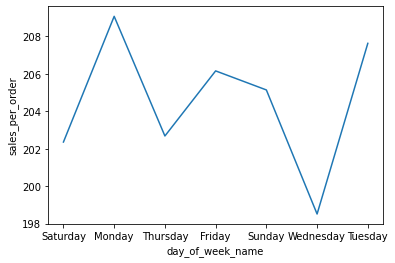

In [75]:
##  plotting mean of sales for day of week
sns.lineplot(x=df_day_of_week.index,y=df_day_of_week,data='df')

From this line plot we can observe higher sales occured during Sunday, Monday, Tuesday, Friday.


<AxesSubplot:xlabel='day_of_month', ylabel='sales_per_order'>

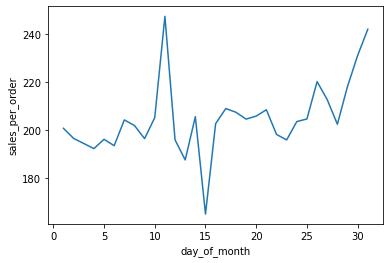

In [76]:
##  plotting mean of sales for day of month
sns.lineplot(x=df_day_of_month.index,y=df_day_of_month,data='df')

**6)Find sales trends by product category.**

In [77]:
ec.category_name.unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [78]:
Sales_by_product_category = ec.groupby(["category_name"])[["sales_per_order"]].sum()

In [79]:
Sales_by_product_category

,sales_per_order
category_name,
Furniture,5012940.515
Office Supplies,13921614.583
Technology,4229107.467


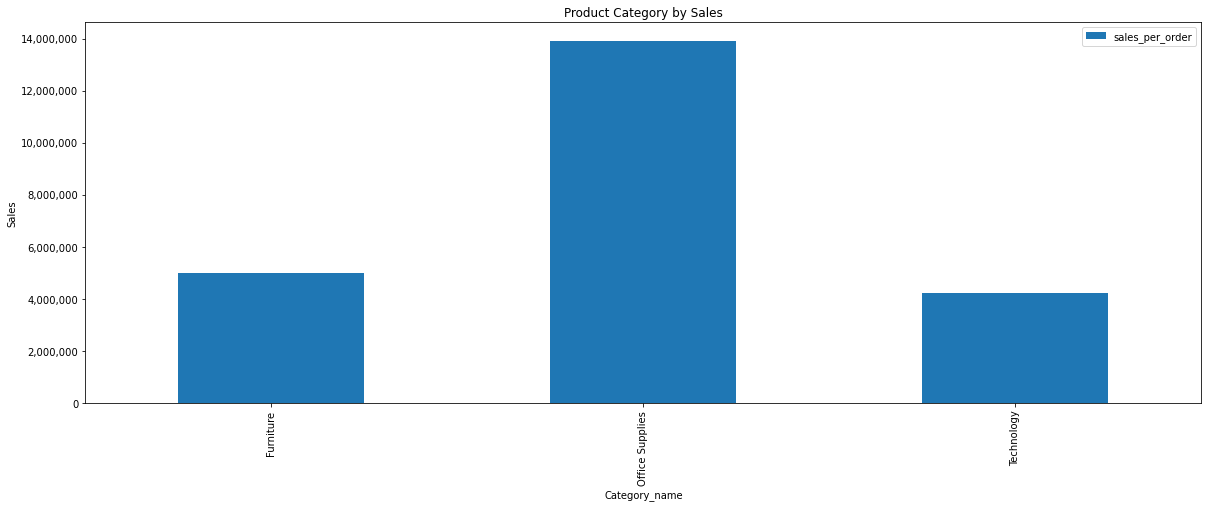

In [80]:
Sales_by_product_category.plot(kind='bar',figsize=(20,7))
plt.xlabel('Category_name')
plt.ylabel('Sales')
plt.title('Product Category by Sales')
Sales_by_product_category = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Sales_by_product_category])
plt.show()

From the above Bar chart 'Office supplies' product category has the highest sales campared to 'Furniture' and 'Technology'.

**7)Find sales trends by customer category.**

In [81]:
ec.customer_segment.unique()

array(['Corporate', 'Consumer', 'Home Office'], dtype=object)

In [82]:
Sales_by_customer_category = ec.groupby(["customer_segment"])[["sales_per_order"]].sum()

In [83]:
Sales_by_customer_category

,sales_per_order
customer_segment,
Consumer,11989198.576
Corporate,7016755.673
Home Office,4157708.316


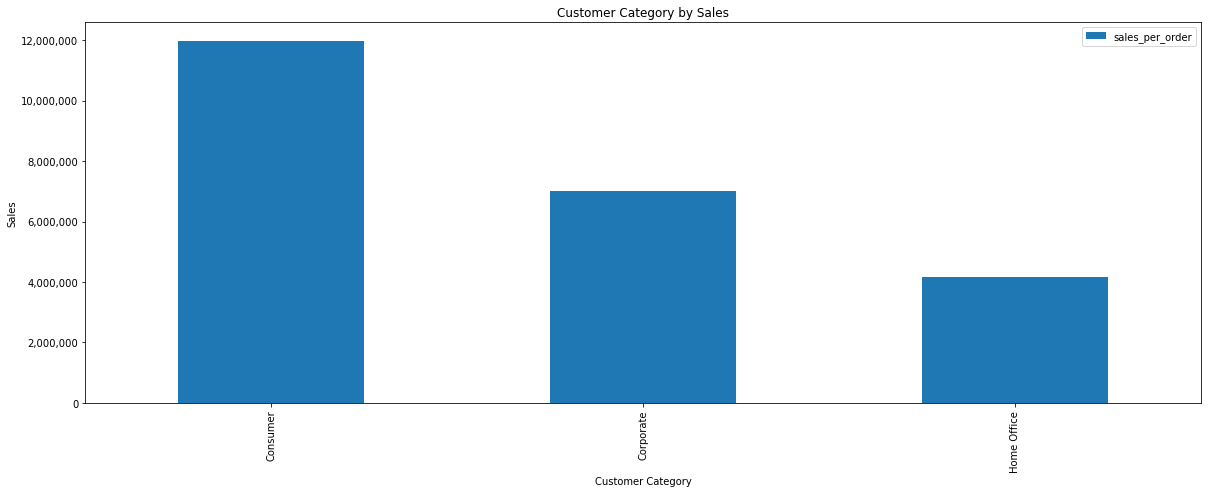

In [84]:
Sales_by_customer_category.plot(kind='bar',figsize=(20,7))
plt.xlabel('Customer Category')
plt.ylabel('Sales')
plt.title('Customer Category by Sales')
Sales_by_customer_category = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Sales_by_customer_category])
plt.show()

From the above Bar chart 'Consumer' customer category has the highest sales campared to 'Corporate' and 'Home office' Customer Category

**8)Profits based on States, products, and Regions.**

In [85]:
Profits_by_state = ec.groupby(["customer_state"])[["profit_per_order"]].sum()

In [86]:
Profits_by_state

,profit_per_order
customer_state,
Alabama,17128.670
Arizona,53641.300
Arkansas,14113.750
California,548001.210
Colorado,38934.670
Connecticut,21826.740
Delaware,25181.710
District of Columbia,3710.980
Florida,110026.700


In [87]:
Profits_by_state.sort_values(by = 'profit_per_order', ascending = False, inplace = True)

In [88]:
Profits_by_state.head(10)

,profit_per_order
customer_state,
California,548001.210
New York,299044.750
Texas,249437.530
Pennsylvania,161159.900
Washington,140622.220
Illinois,125730.390
Ohio,117543.010
Florida,110026.700
Michigan,55512.280


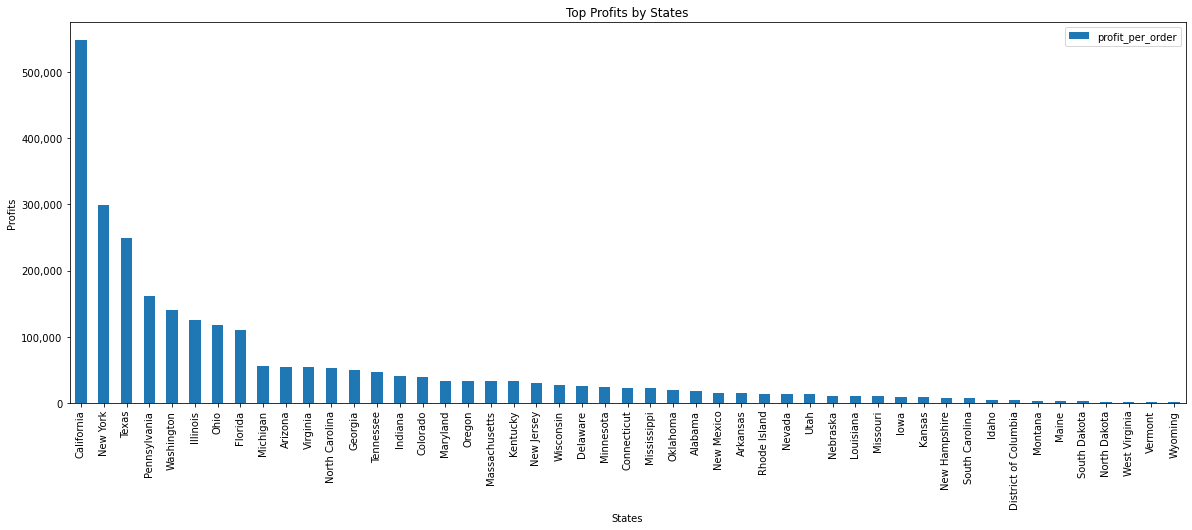

In [89]:
Profits_by_state.plot(kind='bar',figsize=(20,7))
plt.xlabel('States')
plt.ylabel('Profits')
plt.title('Top Profits by States')
Profits_by_state = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Profits_by_state])
plt.show()

From above Bar Graph we can observe that California, New York, Texas are the top three states which are providing best profits.

In [90]:
Profits_by_products = ec.groupby(["product_name"])[["profit_per_order"]].sum()

In [91]:
Profits_by_products.head()

,profit_per_order
product_name,
"""While you Were Out"" Message Book, One Form per Page",404.230
"#10 Gummed Flap White Envelopes, 100/Box",1189.640
#10 Self-Seal White Envelopes,1599.520
"#10 White Business Envelopes,4 1/8 x 9 1/2",676.040
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",3541.980


In [92]:
Profits_by_products.sort_values(by = 'profit_per_order', ascending = False, inplace = True)

In [95]:
Top_10_profits_by_products = Profits_by_products.head(10)

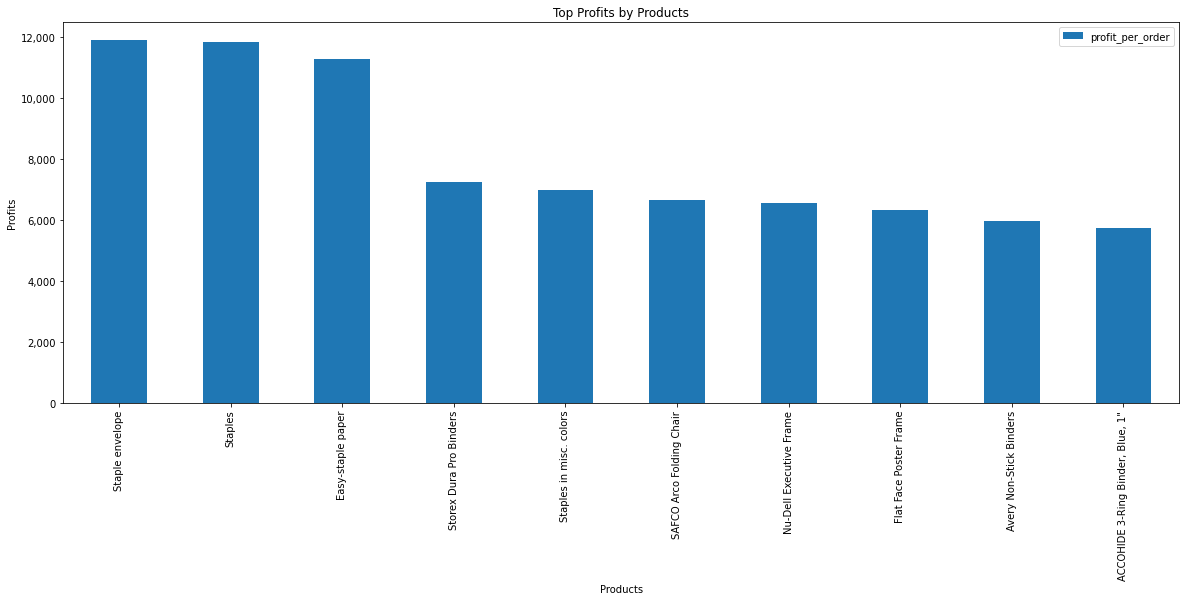

In [96]:
Top_10_profits_by_products.plot(kind='bar',figsize=(20,7))
plt.xlabel('Products')
plt.ylabel('Profits')
plt.title('Top Profits by Products')
Top_10_profits_by_products = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Top_10_profits_by_products])
plt.show()

Top 10 Products that are given best profits.

In [99]:
Top_10_losses_by_products = Profits_by_products.tail(10)

In [100]:
Top_10_losses_by_products

,profit_per_order
product_name,
Avery 491,-1269.600
Avery 479,-1383.680
50 Colored Long Pencils,-1404.610
"Tenex File Box, Personal Filing Tote with Lid, Black",-1605.950
"Alliance Big Bands Rubber Bands, 12/Pack",-1662.470
"Executive Impressions 13-1/2"" Indoor/Outdoor Wall Clock",-1817.490
Logitech Mobile Speakerphone P710e - speaker phone,-1997.720
"Global Armless Task Chair, Royal Blue",-2182.870
Logitech Gaming G510s - Keyboard,-2507.070


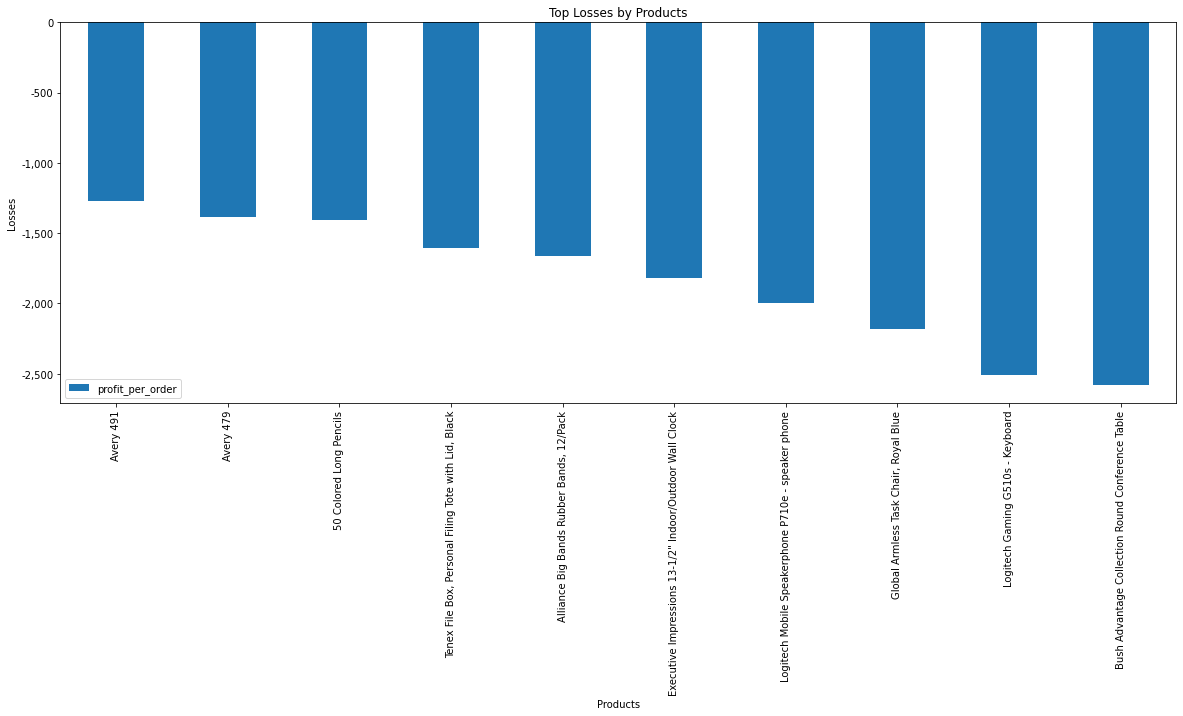

In [101]:
Top_10_losses_by_products.plot(kind='bar',figsize=(20,7))
plt.xlabel('Products')
plt.ylabel('Losses')
plt.title('Top Losses by Products')
Top_10_losses_by_products = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Top_10_losses_by_products])
plt.show()

In [102]:
Profits_by_Region = ec.groupby(["customer_region"])[["profit_per_order"]].sum()

In [103]:
Profits_by_Region

,profit_per_order
customer_region,
Central,584925.121
East,751779.321
South,413380.331
West,862984.120


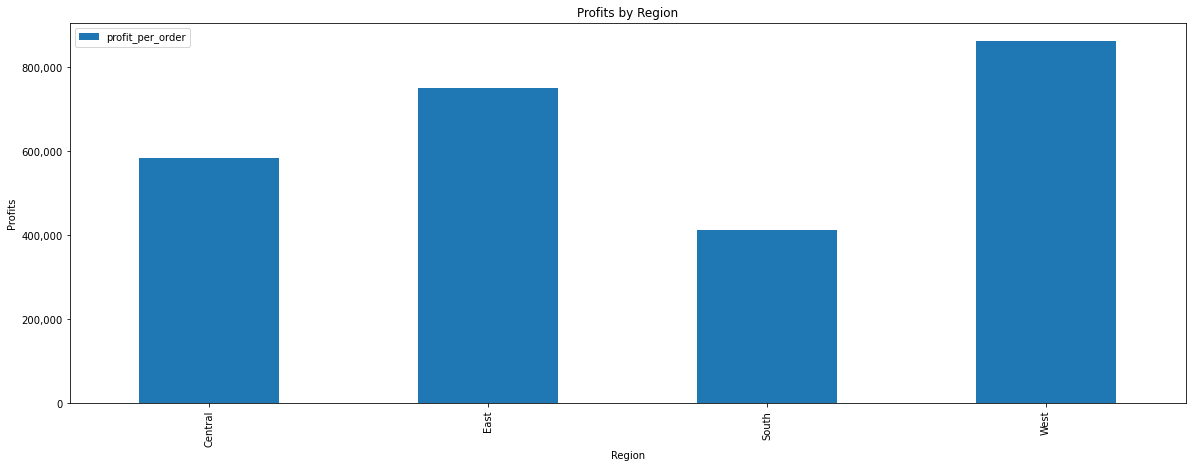

In [104]:
Profits_by_Region.plot(kind='bar',figsize=(20,7))
plt.xlabel('Region')
plt.ylabel('Profits')
plt.title('Profits by Region')
Profits_by_Region = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in Profits_by_Region])
plt.show()

From the above Bar Graph we can conclude that West Region has produced the best profit followed by East, Central and South
Regions. South region has produced the least profit.